In [75]:
%matplotlib notebook

In [1]:
import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import LinearSegmentedColormap

/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from retrieve_features import *

In [3]:
import sys
sys.path.append('/Users/agalicina/Term10/genehack/genehack2016')
from process import *

In [122]:
all_imgs, ys = load_data('/Users/agalicina/Term10/genehack/processed_images/')

loading data from /Users/agalicina/Term10/genehack/processed_images/
loading subdir data from /Users/agalicina/Term10/genehack/processed_images/bad_pics
total 263 keys
loading subdir data from /Users/agalicina/Term10/genehack/processed_images/good_pics
total 1084 keys


In [123]:
sigmas = np.arange(10,100,10)

In [140]:
?sns.distplot

In [124]:
data = {'sigma':[], 'value':[], 'y':[]}
for i in range(len(ys)):
    img_pic  = all_imgs[i]['pic_nucleus']
    img_mask = all_imgs[i]['nucleus']
    y        = ys[i]
    for s in sigmas:
        value = compute_sum_gaussian(img_mask, img_pic, sigma=s, size=150, mode='abs')
        data['sigma'].append(s)
        data['value'].append(value)
        data['y'].append(y)

In [125]:
data = {k:np.array(data[k]) for k in data.keys()}

In [129]:
?np.histogram

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


<IPython.core.display.Javascript object>


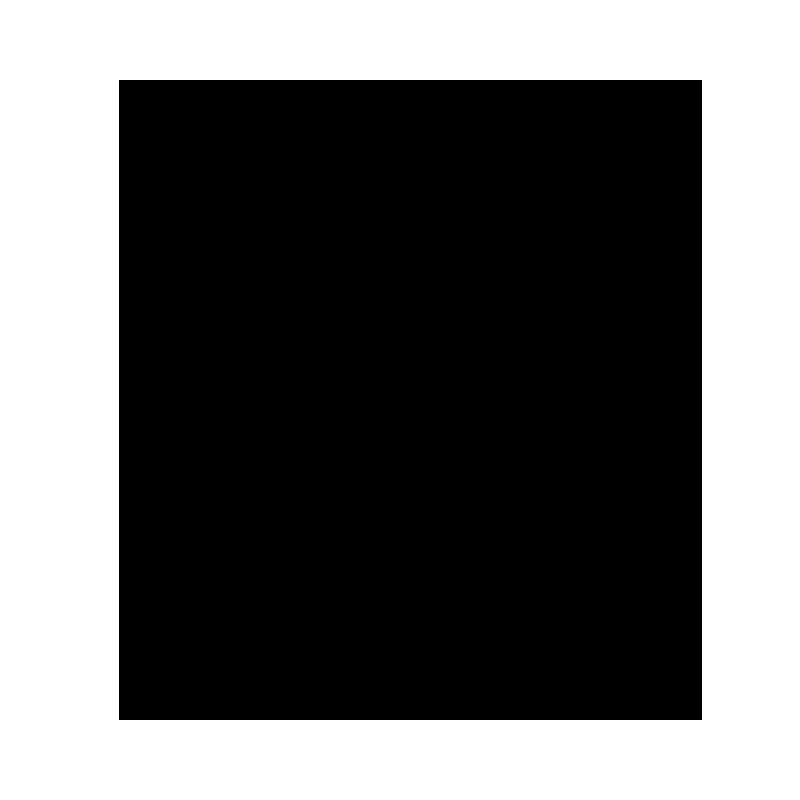

In [139]:
nb = 50

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
colors = LinearSegmentedColormap('colormap', cm.jet._segmentdata.copy(), len(sigmas))
for z in [20]: #sigmas:
    vals = data['value'][(data['sigma']==z)&(data['y']==0)]
    #ygs =     data['y'][data['sigma']==z]
    hist = np.histogram(vals, bins=nb,density=True)
    xs = hist[1][0:-1]
    yss = hist[0]
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = 'r'
    ax.bar(xs, yss, zs=z, zdir='y', color=cs, alpha=0.5, width=100)

    vals = data['value'][(data['sigma']==z)&(data['y']==1)]
    #print(vals)
    #ygs =     data['y'][data['sigma']==z]
    hist = np.histogram(vals,bins=nb,density=True)
    xs = hist[1][0:-1]
    yss = hist[0]
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = 'g'
    ax.bar(xs, yss, zs=z, zdir='y', color=cs, alpha=0.5, width=100)
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [134]:
vals_n = data['value'][(data['sigma']==20)&(data['y']==0)]
#ygs =     data['y'][data['sigma']==z]
hist_n = np.histogram(vals_n, bins=nb,density=True)
vals_p = data['value'][(data['sigma']==20)&(data['y']==1)]
#ygs =     data['y'][data['sigma']==z]
hist_p = np.histogram(vals_p, bins=nb,density=True)

In [ ]:
### roc


In [32]:
import seaborn as sns
import pandas as pd

In [34]:
df = pd.DataFrame(data)

In [39]:
df[0:5]

sigma          value         y
0    1.0  498959.242793  0.526785
1    1.5  322422.610005  0.526785
2    2.0  230099.937761  0.526785
3    2.5  176092.022405  0.526785
4    3.0  141337.071406  0.526785

In [38]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            350, 351, 352, 353, 354, 355, 356, 357, 358, 359],
           dtype='int64', length=360)

### Преобразование Хафа границ

In [141]:
import retrieve_features as rf

In [163]:
reload(rf)

<module 'retrieve_features' from 'retrieve_features.pyc'>

In [142]:
all_imgs, ys = load_data('/Users/agalicina/Term10/genehack/marked_1410_H2AX_Rad51_CM_05_1h_2h_4h_6h')

loading data from /Users/agalicina/Term10/genehack/marked_1410_H2AX_Rad51_CM_05_1h_2h_4h_6h
loading subdir data from /Users/agalicina/Term10/genehack/marked_1410_H2AX_Rad51_CM_05_1h_2h_4h_6h/bad_pics
total 55 keys
loading subdir data from /Users/agalicina/Term10/genehack/marked_1410_H2AX_Rad51_CM_05_1h_2h_4h_6h/good_pics
total 964 keys


In [164]:
img = all_imgs[0]['pic_nucleus']
#imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cnt = rf.find_contour(img)

In [165]:
cnt[0]

array([[85,  3]], dtype=int32)

In [171]:
%matplotlib inline

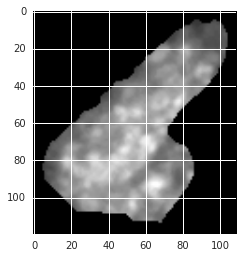

In [175]:
img1 = img.copy()
cv2.drawContours(img1, [cnt], 0, (0,0,255), 2)
plt.imshow(img1, cmap='gray')
plt.show()
#cv2.imwrite('ex.png', img1)

In [176]:
class Border():
    def __init__(self, img):
        self.img = img.copy()
        self.border_mask = self.get_border()
    
    def get_border(self):
        empty_image = self.img.copy()
        empty_image.fill(0)
        
        for i in range(1,len(img)-1):
            for j in range(1,len(img[0])-1):
                if (img[i, j]>0)and(np.any(img[i-1:i+2, j-1:j+2]==0)):
                    empty_image[i, j] = 1
        for i in range(0,len(img)):
            if (img[i,0]>0):
                empty_image[i,0] = 1
            if (img[i,len(img[0])-1]>0):
                empty_image[i,len(img[0])-1] = 1
        for j in range(0,len(img[0])):
            if (img[0,j]>0):
                empty_image[0,j] = 1
            if (img[len(img)-1,j]>0):
                empty_image[len(img)-1,j] = 1
                
        return empty_image.copy()

In [177]:
a = Border(img)

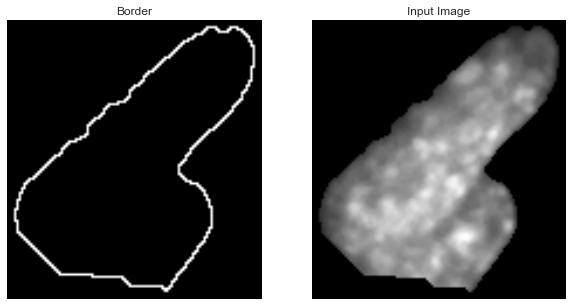

In [179]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(a.border_mask, cmap = 'gray')
plt.title('Border'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [252]:
?cv2.HoughLinesP

In [442]:
img = all_imgs[10]['nucleus'].copy()
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img,0,0)
P = rf.get_perimeter(rf.find_contour(img))
print(P)
#plt.imshow(edges)

minLineLength = 3*P
maxLineGap = 0.5*P

img1 = img.copy()
img1.fill(1)

lines = cv2.HoughLinesP(edges, 1, np.pi/90, 10, 100, minLineLength=minLineLength, maxLineGap=maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img1,(x1,y1),(x2,y2),(0,255,0),1)
    
plt.clf()

5.65685415268


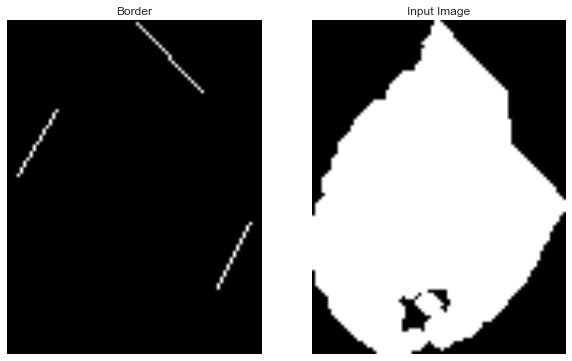

In [443]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img1)
plt.title('Border'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [190]:
?cv2.Canny

In [480]:
reload(rf)

<module 'retrieve_features' from 'retrieve_features.py'>

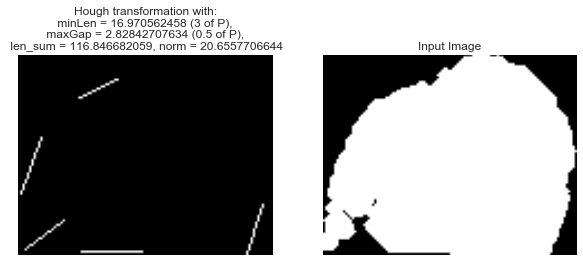

In [478]:
rf.plot_Hough(all_imgs[2]['nucleus'], 'ex.png', 3, 0.5)

In [481]:
rf.get_Hough_lines_lens(all_imgs[2]['nucleus'], 3, 0.5)

20.655770664362258